# Carregamento dos Pacotes

In [1]:
import sklearn
import xgboost
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix, max_error, explained_variance_score, accuracy_score, mean_absolute_error
from joblib import dump
import warnings
warnings.filterwarnings('ignore')

# Trabalhando com os Dados

In [2]:
df = pd.read_csv('dataset.csv')

In [3]:
df.shape

(600, 13)

In [4]:
df.head()

,ID_Emprestimo,Genero,Casado,Dependentes,Educacao,Empreendedor,SalarioAnualAplicantePrincipal,SalarioAnualCoAplicante,Score_Risco,TempoEmprestimo,Historico_Credito,LocalResidencia,StatusEmprestimo
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID_Emprestimo                   600 non-null    object 
 1   Genero                          587 non-null    object 
 2   Casado                          597 non-null    object 
 3   Dependentes                     585 non-null    object 
 4   Educacao                        600 non-null    object 
 5   Empreendedor                    570 non-null    object 
 6   SalarioAnualAplicantePrincipal  600 non-null    int64  
 7   SalarioAnualCoAplicante         600 non-null    float64
 8   Score_Risco                     579 non-null    float64
 9   TempoEmprestimo                 586 non-null    float64
 10  Historico_Credito               551 non-null    float64
 11  LocalResidencia                 600 non-null    object 
 12  StatusEmprestimo                600 

# Análise Exploratória dos Dados

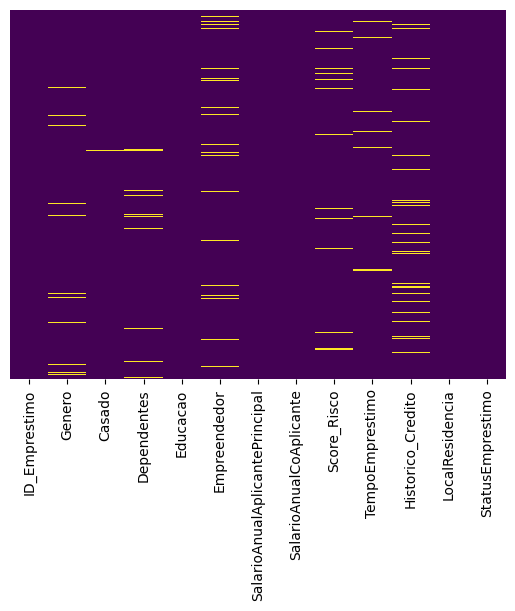

In [6]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis');

In [7]:
percentual_ausentes = df.isnull().mean() * 100
percentual_ausentes

ID_Emprestimo                     0.000000
Genero                            2.166667
Casado                            0.500000
Dependentes                       2.500000
Educacao                          0.000000
Empreendedor                      5.000000
SalarioAnualAplicantePrincipal    0.000000
SalarioAnualCoAplicante           0.000000
Score_Risco                       3.500000
TempoEmprestimo                   2.333333
Historico_Credito                 8.166667
LocalResidencia                   0.000000
StatusEmprestimo                  0.000000
dtype: float64

In [8]:
df.columns

Index(['ID_Emprestimo', 'Genero', 'Casado', 'Dependentes', 'Educacao',
       'Empreendedor', 'SalarioAnualAplicantePrincipal',
       'SalarioAnualCoAplicante', 'Score_Risco', 'TempoEmprestimo',
       'Historico_Credito', 'LocalResidencia', 'StatusEmprestimo'],
      dtype='object')

In [9]:
df['Genero'].value_counts()

Genero
Male      473
Female    114
Name: count, dtype: int64

In [10]:
genero = pd.get_dummies(df['Genero'], drop_first= True)

In [11]:
df.drop(['Genero', 'ID_Emprestimo'], axis = 1, inplace = True)

In [12]:
df = pd.concat([df, genero], axis = 1)

In [13]:
df.sample(5)

,Casado,Dependentes,Educacao,Empreendedor,SalarioAnualAplicantePrincipal,SalarioAnualCoAplicante,Score_Risco,TempoEmprestimo,Historico_Credito,LocalResidencia,StatusEmprestimo,Male
56,Yes,0,Graduate,No,2132,1591.0,96.0,360.0,1.0,Semiurban,Y,True
188,Yes,0,Graduate,Yes,674,5296.0,168.0,360.0,1.0,Rural,Y,False
212,Yes,1,Graduate,Yes,7787,0.0,240.0,360.0,1.0,Urban,Y,True
304,No,0,Graduate,No,4000,2500.0,140.0,360.0,1.0,Urban,Y,True
387,Yes,0,Not Graduate,No,3010,3136.0,NaN,360.0,0.0,Urban,N,True


In [14]:
df = df.rename(columns={'Male': 'Genero Masculino'})

In [15]:
df.sample(5)

,Casado,Dependentes,Educacao,Empreendedor,SalarioAnualAplicantePrincipal,SalarioAnualCoAplicante,Score_Risco,TempoEmprestimo,Historico_Credito,LocalResidencia,StatusEmprestimo,Genero Masculino
427,Yes,2,Graduate,No,5935,0.0,133.0,360.0,1.0,Semiurban,Y,True
12,Yes,2,Graduate,No,3073,8106.0,200.0,120.0,1.0,Urban,Y,True
344,Yes,2,Graduate,NaN,2583,2330.0,125.0,360.0,1.0,Rural,Y,False
309,Yes,2,Not Graduate,No,7667,0.0,185.0,360.0,NaN,Rural,Y,True
311,No,0,Not Graduate,No,2927,2405.0,111.0,360.0,1.0,Semiurban,Y,True


In [16]:
df['Casado'].value_counts()

Casado
Yes    388
No     209
Name: count, dtype: int64

In [17]:
casado = pd.get_dummies(df['Casado'], drop_first= True)

In [18]:
df['Educacao'].value_counts()

Educacao
Graduate        462
Not Graduate    138
Name: count, dtype: int64

In [19]:
graduado = pd.get_dummies(df['Educacao'], drop_first= True)

In [20]:
df.drop(['Casado', 'Educacao'], axis = 1, inplace= True)

In [21]:
df = pd.concat([df, casado, graduado], axis = 1)

In [22]:
df.sample(5)

,Dependentes,Empreendedor,SalarioAnualAplicantePrincipal,SalarioAnualCoAplicante,Score_Risco,TempoEmprestimo,Historico_Credito,LocalResidencia,StatusEmprestimo,Genero Masculino,Yes,Not Graduate
339,0,No,4160,0.0,71.0,360.0,1.0,Semiurban,Y,False,False,False
373,1,No,3062,1987.0,111.0,180.0,0.0,Urban,N,True,False,False
412,0,No,6096,0.0,218.0,360.0,0.0,Rural,N,True,True,True
476,2,No,16700,11750.0,230.0,300.0,1.0,Semiurban,Y,True,True,False
446,2,No,4652,0.0,110.0,360.0,1.0,Rural,Y,True,True,True


In [23]:
df = df.rename(columns= {'Yes': 'Casado', 'Not Graduate': 'Sem_Graduacao'})

In [24]:
df.sample(5)

,Dependentes,Empreendedor,SalarioAnualAplicantePrincipal,SalarioAnualCoAplicante,Score_Risco,TempoEmprestimo,Historico_Credito,LocalResidencia,StatusEmprestimo,Genero Masculino,Casado,Sem_Graduacao
163,2,No,4167,1447.0,158.0,360.0,1.0,Rural,Y,True,True,False
57,0,No,3366,2200.0,135.0,360.0,1.0,Rural,N,True,True,False
192,0,No,6033,0.0,160.0,360.0,1.0,Urban,N,True,True,True
2,0,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,True,True,False
301,NaN,No,2875,1750.0,105.0,360.0,1.0,Semiurban,Y,True,True,True


In [25]:
df.columns

Index(['Dependentes', 'Empreendedor', 'SalarioAnualAplicantePrincipal',
       'SalarioAnualCoAplicante', 'Score_Risco', 'TempoEmprestimo',
       'Historico_Credito', 'LocalResidencia', 'StatusEmprestimo',
       'Genero Masculino', 'Casado', 'Sem_Graduacao'],
      dtype='object')

In [26]:
df['Empreendedor'].value_counts()

Empreendedor
No     489
Yes     81
Name: count, dtype: int64

In [27]:
empreendedor = pd.get_dummies(df['Empreendedor'], drop_first= True)

In [28]:
df.drop(['Empreendedor'], axis = 1, inplace= True)

In [29]:
df = pd.concat([df, empreendedor], axis = 1)

In [30]:
df.sample(5)

,Dependentes,SalarioAnualAplicantePrincipal,SalarioAnualCoAplicante,Score_Risco,TempoEmprestimo,Historico_Credito,LocalResidencia,StatusEmprestimo,Genero Masculino,Casado,Sem_Graduacao,Yes
539,3+,6417,0.0,157.0,180.0,1.0,Rural,Y,True,True,False,False
154,0,3254,0.0,50.0,360.0,1.0,Urban,Y,True,False,False,False
198,0,3416,2816.0,113.0,360.0,NaN,Semiurban,Y,False,True,False,False
496,0,2600,1700.0,107.0,360.0,1.0,Rural,Y,True,True,True,False
359,3+,5167,3167.0,200.0,360.0,1.0,Semiurban,Y,True,True,False,False


In [31]:
df = df.rename(columns= {'Yes': 'Empreendedor'})

In [32]:
df.sample(10)

,Dependentes,SalarioAnualAplicantePrincipal,SalarioAnualCoAplicante,Score_Risco,TempoEmprestimo,Historico_Credito,LocalResidencia,StatusEmprestimo,Genero Masculino,Casado,Sem_Graduacao,Empreendedor
160,0,1863,1041.0,98.0,360.0,1.0,Semiurban,Y,True,True,True,False
43,0,3941,2336.0,134.0,360.0,1.0,Semiurban,Y,True,True,False,False
247,1,6608,0.0,137.0,180.0,1.0,Urban,Y,True,True,True,False
500,0,645,3683.0,113.0,480.0,1.0,Rural,Y,False,False,False,False
13,0,1853,2840.0,114.0,360.0,1.0,Rural,N,True,False,False,False
565,0,4467,0.0,120.0,360.0,NaN,Rural,Y,True,True,True,False
579,0,3182,2917.0,161.0,120.0,1.0,Urban,Y,True,False,False,False
18,0,4887,0.0,133.0,360.0,1.0,Rural,N,True,True,True,False
434,0,3750,0.0,100.0,360.0,1.0,Urban,Y,True,False,False,False
576,0,3087,2210.0,136.0,360.0,0.0,Semiurban,N,False,True,False,False


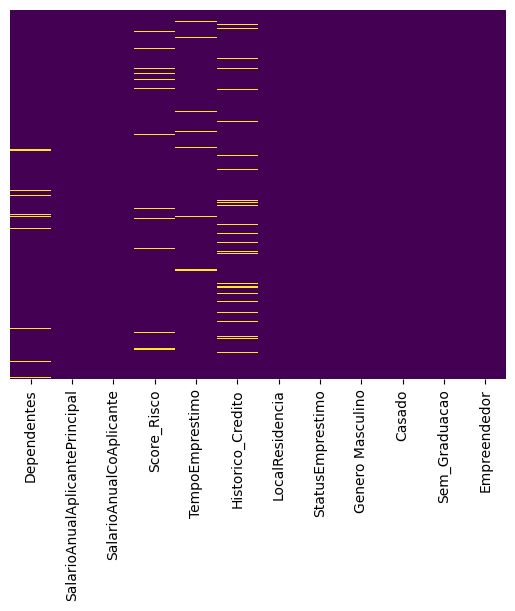

In [33]:
sns.heatmap(df.isnull(), yticklabels= False, cbar = False, cmap = 'viridis');

In [34]:
df.columns

Index(['Dependentes', 'SalarioAnualAplicantePrincipal',
       'SalarioAnualCoAplicante', 'Score_Risco', 'TempoEmprestimo',
       'Historico_Credito', 'LocalResidencia', 'StatusEmprestimo',
       'Genero Masculino', 'Casado', 'Sem_Graduacao', 'Empreendedor'],
      dtype='object')

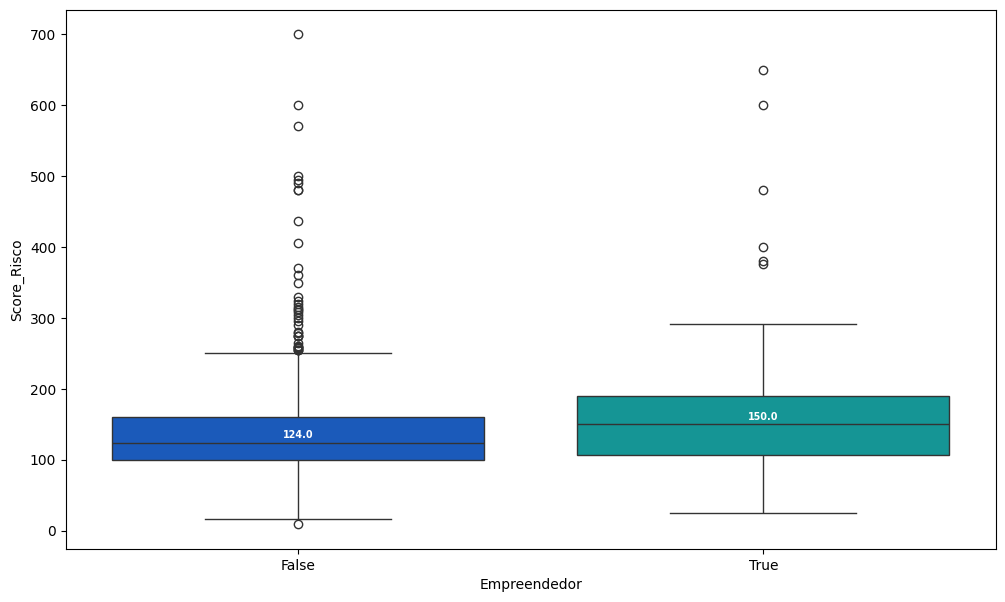

In [35]:
plt.figure(figsize=(12, 7))
bx = sns.boxplot(x = 'Empreendedor', y = 'Score_Risco', data = df, palette= 'winter')
medians = df.groupby(['Empreendedor'])['Score_Risco'].median()
vertical_offset = df['Score_Risco'].median() * 0.05
for xtick in bx.get_xticks():
    bx.text(xtick,
            medians[xtick] + vertical_offset,
            medians[xtick],
            horizontalalignment = 'center',
            size = 'x-small',
            color = 'w',
            weight = 'semibold')

In [36]:
def func_imputacao(cols):

    score_risco = cols[0]
    selfemp = cols[1]
    if pd.isnull(score_risco):
        if selfemp == 1:
            return 150
        else:
            return 125
    else:
        return score_risco

In [37]:
df['Score_Risco'] = df[['Score_Risco', 'Empreendedor']].apply(func_imputacao, axis = 1)

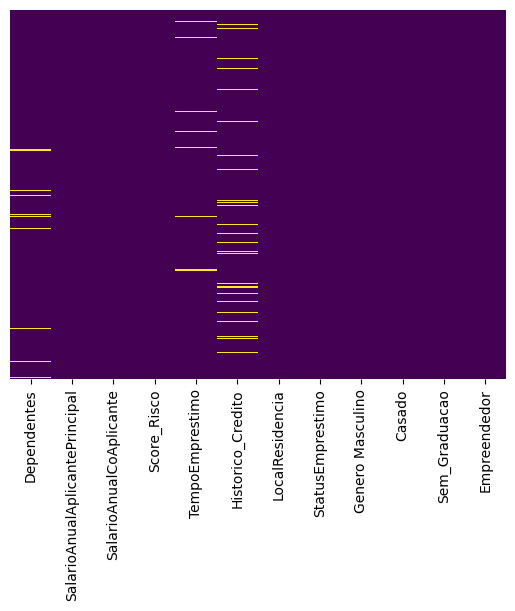

In [38]:
sns.heatmap(df.isnull(), yticklabels= False, cbar= False, cmap= 'viridis');

In [39]:
df.columns

Index(['Dependentes', 'SalarioAnualAplicantePrincipal',
       'SalarioAnualCoAplicante', 'Score_Risco', 'TempoEmprestimo',
       'Historico_Credito', 'LocalResidencia', 'StatusEmprestimo',
       'Genero Masculino', 'Casado', 'Sem_Graduacao', 'Empreendedor'],
      dtype='object')

In [40]:
df['Historico_Credito'].value_counts()

Historico_Credito
1.0    463
0.0     88
Name: count, dtype: int64

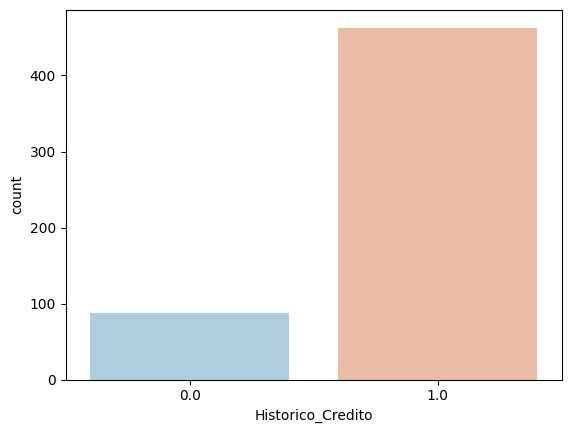

In [41]:
sns.countplot(x = 'Historico_Credito', data= df, palette = 'RdBu_r');

In [42]:
df.drop(['Historico_Credito'], axis = 1, inplace= True)

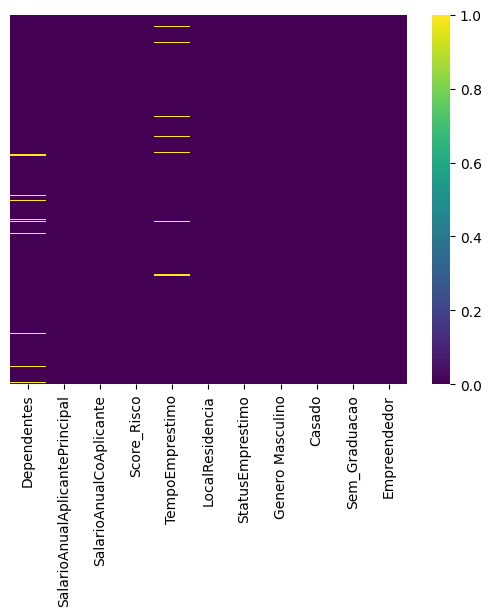

In [43]:
sns.heatmap(df.isnull(), yticklabels= False, cbar= True, cmap= 'viridis');

In [44]:
df.columns

Index(['Dependentes', 'SalarioAnualAplicantePrincipal',
       'SalarioAnualCoAplicante', 'Score_Risco', 'TempoEmprestimo',
       'LocalResidencia', 'StatusEmprestimo', 'Genero Masculino', 'Casado',
       'Sem_Graduacao', 'Empreendedor'],
      dtype='object')

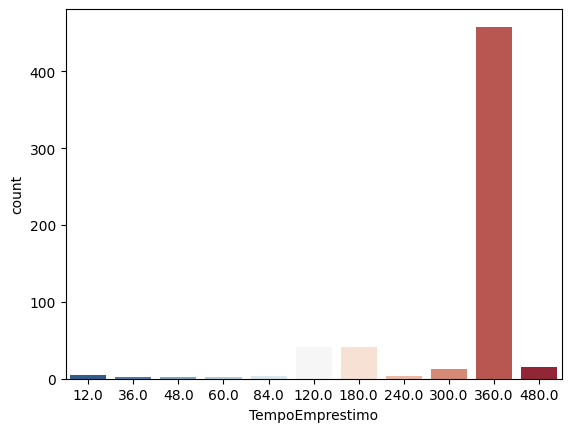

In [45]:
sns.countplot(x = 'TempoEmprestimo', data= df, palette= 'RdBu_r');

In [46]:
percentual_ausentes = df.isnull().mean() * 100
percentual_ausentes

Dependentes                       2.500000
SalarioAnualAplicantePrincipal    0.000000
SalarioAnualCoAplicante           0.000000
Score_Risco                       0.000000
TempoEmprestimo                   2.333333
LocalResidencia                   0.000000
StatusEmprestimo                  0.000000
Genero Masculino                  0.000000
Casado                            0.000000
Sem_Graduacao                     0.000000
Empreendedor                      0.000000
dtype: float64

In [47]:
df = df.dropna(subset= ['TempoEmprestimo'])

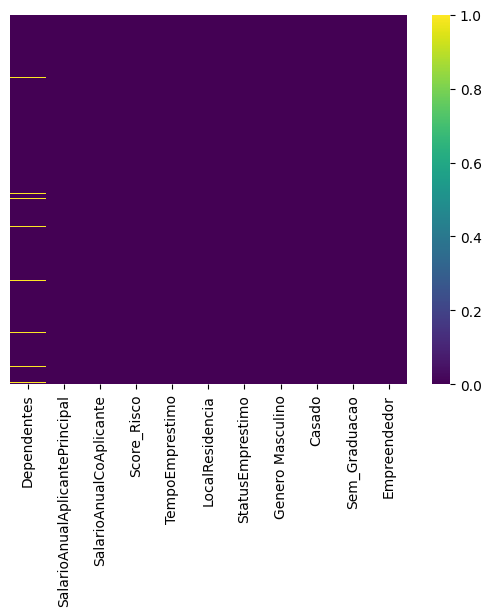

In [48]:
sns.heatmap(df.isnull(), yticklabels= False, cbar = True, cmap= 'viridis');

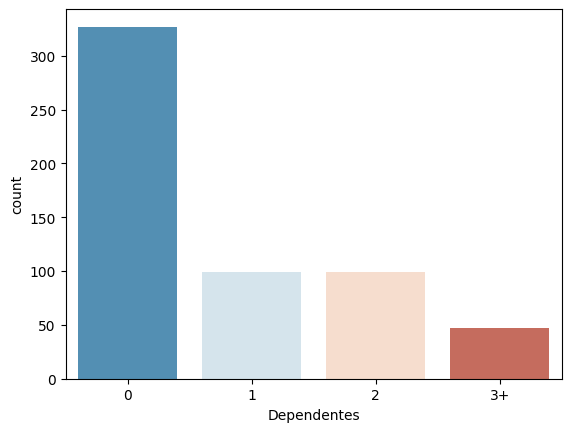

In [49]:
sns.countplot(x = 'Dependentes', data= df, palette= 'RdBu_r');

In [50]:
df = df.replace(to_replace= '3+', value = 3)

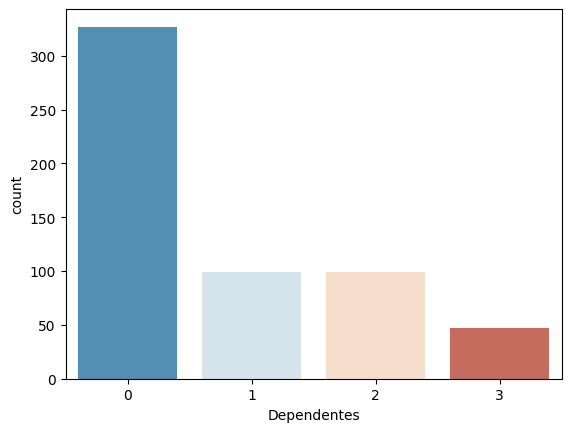

In [51]:
sns.countplot(x = 'Dependentes', data= df, palette= 'RdBu_r');

In [52]:
percentual_ausentes = df.isnull().mean() * 100
percentual_ausentes

Dependentes                       2.389078
SalarioAnualAplicantePrincipal    0.000000
SalarioAnualCoAplicante           0.000000
Score_Risco                       0.000000
TempoEmprestimo                   0.000000
LocalResidencia                   0.000000
StatusEmprestimo                  0.000000
Genero Masculino                  0.000000
Casado                            0.000000
Sem_Graduacao                     0.000000
Empreendedor                      0.000000
dtype: float64

In [53]:
df = df.dropna(subset= ['Dependentes'])

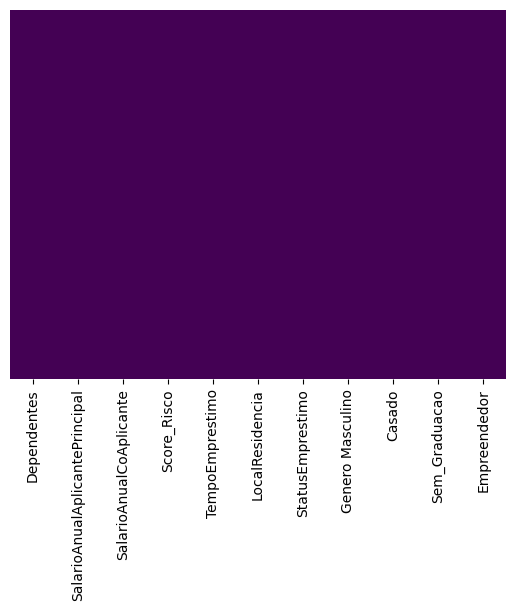

In [54]:
sns.heatmap(df.isnull(), yticklabels= False, cbar = False, cmap= 'viridis');

In [55]:
percentual_ausentes = df.isnull().mean() * 100
percentual_ausentes

Dependentes                       0.0
SalarioAnualAplicantePrincipal    0.0
SalarioAnualCoAplicante           0.0
Score_Risco                       0.0
TempoEmprestimo                   0.0
LocalResidencia                   0.0
StatusEmprestimo                  0.0
Genero Masculino                  0.0
Casado                            0.0
Sem_Graduacao                     0.0
Empreendedor                      0.0
dtype: float64

In [56]:
df.columns

Index(['Dependentes', 'SalarioAnualAplicantePrincipal',
       'SalarioAnualCoAplicante', 'Score_Risco', 'TempoEmprestimo',
       'LocalResidencia', 'StatusEmprestimo', 'Genero Masculino', 'Casado',
       'Sem_Graduacao', 'Empreendedor'],
      dtype='object')

In [57]:
df.head()

,Dependentes,SalarioAnualAplicantePrincipal,SalarioAnualCoAplicante,Score_Risco,TempoEmprestimo,LocalResidencia,StatusEmprestimo,Genero Masculino,Casado,Sem_Graduacao,Empreendedor
0,0,5849,0.0,125.0,360.0,Urban,Y,True,False,False,False
1,1,4583,1508.0,128.0,360.0,Rural,N,True,True,False,False
2,0,3000,0.0,66.0,360.0,Urban,Y,True,True,False,True
3,0,2583,2358.0,120.0,360.0,Urban,Y,True,True,True,False
4,0,6000,0.0,141.0,360.0,Urban,Y,True,False,False,False


In [58]:
status_emprestimo = pd.get_dummies(df['StatusEmprestimo'], drop_first= True)

In [59]:
df.drop(['StatusEmprestimo'], axis = 1, inplace= True)

In [60]:
df = pd.concat([df, status_emprestimo], axis = 1)

In [61]:
df.sample(5)

,Dependentes,SalarioAnualAplicantePrincipal,SalarioAnualCoAplicante,Score_Risco,TempoEmprestimo,LocalResidencia,Genero Masculino,Casado,Sem_Graduacao,Empreendedor,Y
473,0,2500,0.0,93.0,360.0,Urban,False,False,False,True,True
456,0,4301,0.0,118.0,360.0,Urban,True,True,False,False,True
303,1,1625,1803.0,96.0,360.0,Urban,True,True,False,False,True
490,0,2699,2785.0,96.0,360.0,Semiurban,True,False,True,False,True
483,0,10833,0.0,234.0,360.0,Semiurban,True,True,False,False,True


In [62]:
df = df.rename(columns= {'Y': 'Recebe_Emprestimo'})

In [63]:
df.sample(5)

,Dependentes,SalarioAnualAplicantePrincipal,SalarioAnualCoAplicante,Score_Risco,TempoEmprestimo,LocalResidencia,Genero Masculino,Casado,Sem_Graduacao,Empreendedor,Recebe_Emprestimo
91,2,6250,5654.0,188.0,180.0,Semiurban,True,True,False,False,True
484,2,8333,0.0,246.0,360.0,Semiurban,True,True,False,False,True
516,2,2031,1632.0,113.0,480.0,Semiurban,False,True,False,False,True
349,0,2625,6250.0,187.0,12.0,Rural,True,True,True,False,True
330,1,14384,1793.0,117.0,360.0,Urban,True,False,False,False,True


In [64]:
localresidencia = pd.get_dummies(df['LocalResidencia'], drop_first= True)

In [65]:
df.drop(['LocalResidencia'], axis = 1, inplace= True)

In [66]:
df = pd.concat([df, localresidencia], axis = 1)

In [67]:
df.head()

,Dependentes,SalarioAnualAplicantePrincipal,SalarioAnualCoAplicante,Score_Risco,TempoEmprestimo,Genero Masculino,Casado,Sem_Graduacao,Empreendedor,Recebe_Emprestimo,Semiurban,Urban
0,0,5849,0.0,125.0,360.0,True,False,False,False,True,False,True
1,1,4583,1508.0,128.0,360.0,True,True,False,False,False,False,False
2,0,3000,0.0,66.0,360.0,True,True,False,True,True,False,True
3,0,2583,2358.0,120.0,360.0,True,True,True,False,True,False,True
4,0,6000,0.0,141.0,360.0,True,False,False,False,True,False,True


In [68]:
df = df.rename(columns= {'Semiurban': 'AreaSemiUrbana'})

In [69]:
df = df.rename(columns= {'Urban': 'AreaUrbana'})

In [70]:
df.sample(10)

,Dependentes,SalarioAnualAplicantePrincipal,SalarioAnualCoAplicante,Score_Risco,TempoEmprestimo,Genero Masculino,Casado,Sem_Graduacao,Empreendedor,Recebe_Emprestimo,AreaSemiUrbana,AreaUrbana
101,0,14843,13806.0,151.0,120.0,True,False,False,False,True,True,False
2,0,3000,0.0,66.0,360.0,True,True,False,True,True,False,True
360,1,4723,0.0,81.0,360.0,False,False,False,False,False,True,False
304,0,4000,2500.0,140.0,360.0,True,False,False,False,True,False,True
269,1,2876,1560.0,90.0,360.0,False,False,False,False,True,False,True
132,0,2718,0.0,70.0,360.0,True,False,False,False,True,True,False
140,2,5042,2083.0,185.0,360.0,True,True,False,False,False,False,False
477,2,2873,11872.0,132.0,360.0,False,True,False,False,False,True,False
26,0,2799,2253.0,122.0,360.0,True,True,False,False,True,True,False
519,0,3400,0.0,95.0,120.0,False,False,True,False,False,False,False


# Pré-Processamento dos Dados para Classificação

In [71]:
df.columns

Index(['Dependentes', 'SalarioAnualAplicantePrincipal',
       'SalarioAnualCoAplicante', 'Score_Risco', 'TempoEmprestimo',
       'Genero Masculino', 'Casado', 'Sem_Graduacao', 'Empreendedor',
       'Recebe_Emprestimo', 'AreaSemiUrbana', 'AreaUrbana'],
      dtype='object')

In [72]:
x = df.drop(columns= ['Recebe_Emprestimo'])
y = df['Recebe_Emprestimo']

In [73]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.3)

In [74]:
x_train

,Dependentes,SalarioAnualAplicantePrincipal,SalarioAnualCoAplicante,Score_Risco,TempoEmprestimo,Genero Masculino,Casado,Sem_Graduacao,Empreendedor,AreaSemiUrbana,AreaUrbana
544,0,3017,663.0,102.0,360.0,False,True,True,False,True,False
4,0,6000,0.0,141.0,360.0,True,False,False,False,False,True
362,0,4750,2333.0,130.0,360.0,True,True,False,False,False,True
528,1,2679,1302.0,94.0,360.0,True,False,True,False,True,False
37,0,3667,1459.0,144.0,360.0,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
247,1,6608,0.0,137.0,180.0,True,True,True,False,False,True
195,1,3125,2583.0,170.0,360.0,True,True,False,False,True,False
84,1,3988,0.0,50.0,240.0,True,True,False,False,False,True
483,0,10833,0.0,234.0,360.0,True,True,False,False,True,False


In [75]:
scaler_cls = StandardScaler()

In [76]:
scaler_cls.fit(x_train)

StandardScaler()

In [77]:
x_train_scaled = scaler_cls.transform(x_train)
x_test_scaled = scaler_cls.transform(x_test)

# Classificação com KNN

In [78]:
modelo_cls = KNeighborsClassifier(n_neighbors= 3)

In [79]:
modelo_cls.fit(x_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [80]:
pred = modelo_cls.predict(x_test_scaled)

In [81]:
confusion_matrix(y_test, pred)

array([[11, 40],
       [30, 91]])

In [82]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

       False       0.27      0.22      0.24        51
        True       0.69      0.75      0.72       121

    accuracy                           0.59       172
   macro avg       0.48      0.48      0.48       172
weighted avg       0.57      0.59      0.58       172



In [83]:
error_rate = []

for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors= i)
    knn.fit(x_train_scaled, y_train)
    pred_i = knn.predict(x_test_scaled)
    error_rate.append(np.mean(pred_i != y_test))

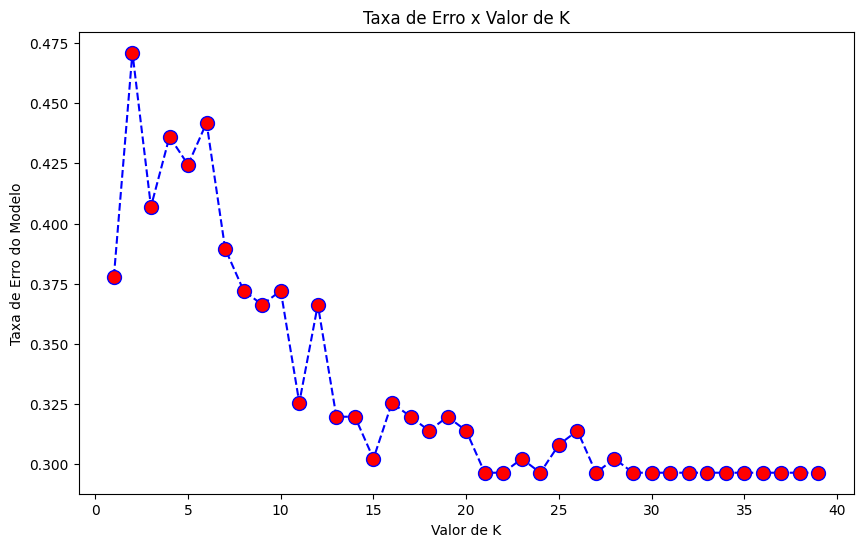

In [84]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 40),
         error_rate,
         color = 'blue',
         linestyle = 'dashed',
         marker = 'o',
         markerfacecolor= 'red',
         markersize = 10)
plt.title('Taxa de Erro x Valor de K')
plt.xlabel('Valor de K')
plt.ylabel('Taxa de Erro do Modelo')
plt.show()

In [85]:
knn = KNeighborsClassifier(n_neighbors= 30)

In [86]:
knn.fit(x_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=30)

In [87]:
pred = knn.predict(x_test_scaled)

In [88]:
print(confusion_matrix(y_test, pred))

[[  0  51]
 [  0 121]]


In [89]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

       False       0.00      0.00      0.00        51
        True       0.70      1.00      0.83       121

    accuracy                           0.70       172
   macro avg       0.35      0.50      0.41       172
weighted avg       0.49      0.70      0.58       172



In [90]:
print(f'{accuracy_score(y_test, pred):.5f}')

0.70349


In [91]:
x_test.columns

Index(['Dependentes', 'SalarioAnualAplicantePrincipal',
       'SalarioAnualCoAplicante', 'Score_Risco', 'TempoEmprestimo',
       'Genero Masculino', 'Casado', 'Sem_Graduacao', 'Empreendedor',
       'AreaSemiUrbana', 'AreaUrbana'],
      dtype='object')

In [92]:
new_client = np.array([1,4554,1229.0,158.0,360.0,True,True,True,False,False,True]).reshape(1, -1)
new_client_scaled = scaler_cls.transform(new_client)

In [93]:
pred_new_client = knn.predict(new_client_scaled)

if pred_new_client[0] == True:
    print('Este cliente pode receber empréstimo!')
else:
    print('Não recomendo conceder empréstimo a este cliente!')

Este cliente pode receber empréstimo!


# Pré-Processamento dos Dados para Regressão

In [94]:
df.columns

Index(['Dependentes', 'SalarioAnualAplicantePrincipal',
       'SalarioAnualCoAplicante', 'Score_Risco', 'TempoEmprestimo',
       'Genero Masculino', 'Casado', 'Sem_Graduacao', 'Empreendedor',
       'Recebe_Emprestimo', 'AreaSemiUrbana', 'AreaUrbana'],
      dtype='object')

In [95]:
x = df.drop(columns= ['Score_Risco'])
y = df['Score_Risco']

In [96]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.3)

In [97]:
scaler_reg = StandardScaler()

In [98]:
scaler_reg.fit(x_train)

StandardScaler()

In [99]:
x_train_scaled = scaler_reg.transform(x_train)
x_test_scaled = scaler_reg.transform(x_test)

# Versão 1 do Modelo de Previsão de Risco - Regressão do Modelo Linear

In [100]:
modelo_v1 = LinearRegression()

In [101]:
modelo_v1.fit(x_train_scaled, y_train)

LinearRegression()

In [102]:
pred1_train = modelo_v1.predict(x_train_scaled)

In [103]:
print(f'Erro do Modelo: {max_error(y_train, pred1_train)}')
print(f'Explained Variance Score: {explained_variance_score(y_train, pred1_train)}')
print(f'Mean Absolute Error: {mean_absolute_error(y_train, pred1_train)}')

Erro do Modelo: 360.68564136721136
Explained Variance Score: 0.23176519276246121
Mean Absolute Error: 46.03988804587876


In [104]:
pred1_test = modelo_v1.predict(x_test_scaled)

In [105]:
print(f'Error do modelo: {max_error(y_test, pred1_test)}')
print(f'Explained Variance Score: {explained_variance_score(y_test, pred1_test)}')
print(f'Mean Absolute Error: {mean_absolute_error(y_test, pred1_test)}')

Error do modelo: 493.4114031264733
Explained Variance Score: 0.11649021892949041
Mean Absolute Error: 51.78828045840457


# Versão 2 do Modelo de Previsão de Risco - Regressão do Modelo Bayesiano 

In [106]:
modelo_v2 = BayesianRidge()

In [107]:
modelo_v2.fit(x_train_scaled, y_train)

BayesianRidge()

In [108]:
pred2_train = modelo_v2.predict(x_train_scaled)

In [109]:
print(f"Erro do Modelo: {max_error(y_train, pred2_train)}")
print(f"Explained Variance Score: {explained_variance_score(y_train, pred2_train)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_train, pred2_train)}")

Erro do Modelo: 367.8600784209698
Explained Variance Score: 0.22966100358676067
Mean Absolute Error: 46.10873426291906


In [110]:
pred2_test = modelo_v2.predict(x_test_scaled)

In [111]:
print(f"Erro do Modelo: {max_error(y_test, pred2_test)}")
print(f"Explained Variance Score: {explained_variance_score(y_test, pred2_test)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, pred2_test)}")

Erro do Modelo: 494.7005163487695
Explained Variance Score: 0.11522405282786063
Mean Absolute Error: 51.45258424014795


# Versão 3 do Modelo de Previsão de Risco - Regressão com Random Forest

In [112]:
modelo_v3 = RandomForestRegressor(max_depth= 2, random_state= 0)

In [113]:
modelo_v3.fit(x_train_scaled, y_train)

RandomForestRegressor(max_depth=2, random_state=0)

In [114]:
pred3_train = modelo_v3.predict(x_train_scaled)

In [115]:
print(f"Erro do Modelo: {max_error(y_train, pred3_train)}")
print(f"Explained Variance Score: {explained_variance_score(y_train, pred3_train)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_train, pred3_train)}")

Erro do Modelo: 285.88056892326904
Explained Variance Score: 0.41691006711384093
Mean Absolute Error: 41.14226360123594


In [116]:
pred3_test = modelo_v3.predict(x_test_scaled)

In [117]:
print(f"Erro do Modelo: {max_error(y_test, pred3_test)}")
print(f"Explained Variance Score: {explained_variance_score(y_test, pred3_test)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, pred3_test)}")

Erro do Modelo: 414.902026882577
Explained Variance Score: 0.40530529045303165
Mean Absolute Error: 43.63542386753295


# Versão 4 do Modelo de Previsão de Risco - Regressão com XGBoost

In [118]:
modelo_v4 = XGBRegressor()

In [119]:
modelo_v4.fit(x_train_scaled, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [120]:
pred4_train = modelo_v4.predict(x_train_scaled)

In [121]:
print(f"Erro do Modelo: {max_error(y_train, pred4_train)}")
print(f"Explained Variance Score: {explained_variance_score(y_train, pred4_train)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_train, pred4_train)}")

Erro do Modelo: 26.262184143066406
Explained Variance Score: 0.9977247959286152
Mean Absolute Error: 2.3159540605545046


In [122]:
pred4_test = modelo_v4.predict(x_test_scaled)

In [123]:
print(f"Erro do Modelo: {max_error(y_test, pred4_test)}")
print(f"Explained Variance Score: {explained_variance_score(y_test, pred4_test)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, pred4_test)}")

Erro do Modelo: 471.49505615234375
Explained Variance Score: 0.28967739097931344
Mean Absolute Error: 50.772593808728594


# Ajustando o Modelo com Melhor Resultado

In [124]:
importancias = modelo_v3.feature_importances_

In [125]:
importancias_df = pd.DataFrame({
    'variável': x_train.columns,
    'importância': importancias
})

In [126]:
importancias_df = importancias_df.sort_values(by = 'importância', ascending= False)

In [127]:
importancias_df

,variável,importância
1,SalarioAnualAplicantePrincipal,0.810565
2,SalarioAnualCoAplicante,0.150672
0,Dependentes,0.012198
9,AreaSemiUrbana,0.010265
8,Recebe_Emprestimo,0.006461
5,Casado,0.002618
6,Sem_Graduacao,0.002534
7,Empreendedor,0.002396
4,Genero Masculino,0.001775
10,AreaUrbana,0.000518


In [128]:
top_3_variaveis = importancias_df['variável'].head(3).values

In [129]:
x_train_relevant = x_train[top_3_variaveis]

In [130]:
x_test_relevant = x_test[top_3_variaveis]

In [131]:
scaler_reg = StandardScaler()

In [132]:
scaler_reg.fit(x_train_relevant)

StandardScaler()

In [133]:
x_train_scaled = scaler_reg.transform(x_train_relevant)
x_test_scaled = scaler_reg.transform(x_test_relevant)

In [134]:
modelo_v3_better = RandomForestRegressor(n_estimators= 200, max_depth= 5)

In [135]:
modelo_v3_better.fit(x_train_scaled, y_train)

RandomForestRegressor(max_depth=5, n_estimators=200)

In [136]:
pred3_train_better = modelo_v3_better.predict(x_train_scaled)

In [137]:
print(f'Erro do Modelo: {max_error(y_train, pred3_train_better)}')
print(f'Explained Variance Score: {explained_variance_score(y_train, pred3_train_better)}')
print(f'Mean Absolute Error: {mean_absolute_error(y_train, pred3_train_better)}')

Erro do Modelo: 213.26533140408145
Explained Variance Score: 0.6915842812493753
Mean Absolute Error: 31.046426179037717


In [138]:
pred3_test_better = modelo_v3_better.predict(x_test_scaled)

In [139]:
print(f'Erro do Modelo: {max_error(y_test, pred3_test_better)}')
print(f'Explained Variance Score: {explained_variance_score(y_test, pred3_test_better)}')
print(f'Mean Absolute Error: {mean_absolute_error(y_test, pred3_test_better)}')

Erro do Modelo: 434.88714531785246
Explained Variance Score: 0.4599098264316991
Mean Absolute Error: 43.47749039338982


# Salvando o Modelo

In [140]:
dump(modelo_v3_better, 'model.pkl')

['model.pkl']

In [141]:
dump(scaler_reg, 'scaler.pkl')

['scaler.pkl']

# Deploy do Modelo

In [142]:
x_test_relevant.columns

Index(['SalarioAnualAplicantePrincipal', 'SalarioAnualCoAplicante',
       'Dependentes'],
      dtype='object')

In [143]:
new_client_relevant = np.array([6950,2358.0,False]).reshape(1, -1)

In [144]:
new_client_relevant = scaler_reg.transform(new_client_relevant)

In [145]:
previsao = modelo_v3_better.predict(new_client_relevant)

In [146]:
print(f'Score de Risco Previsto: {previsao[0]:.3f}')

Score de Risco Previsto: 163.268
